#  Titanic Survival Prediction


In [300]:
# Importing Thr required libraries
import pandas as pd
import numpy as np
# Reading the dataset
data=pd.read_csv("train.csv")
data.head()
# displaying the dataset
import pickle

In [301]:
data.describe()
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [245]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# To Get a good overview of our data lets find out something meaningful and informative through EDA

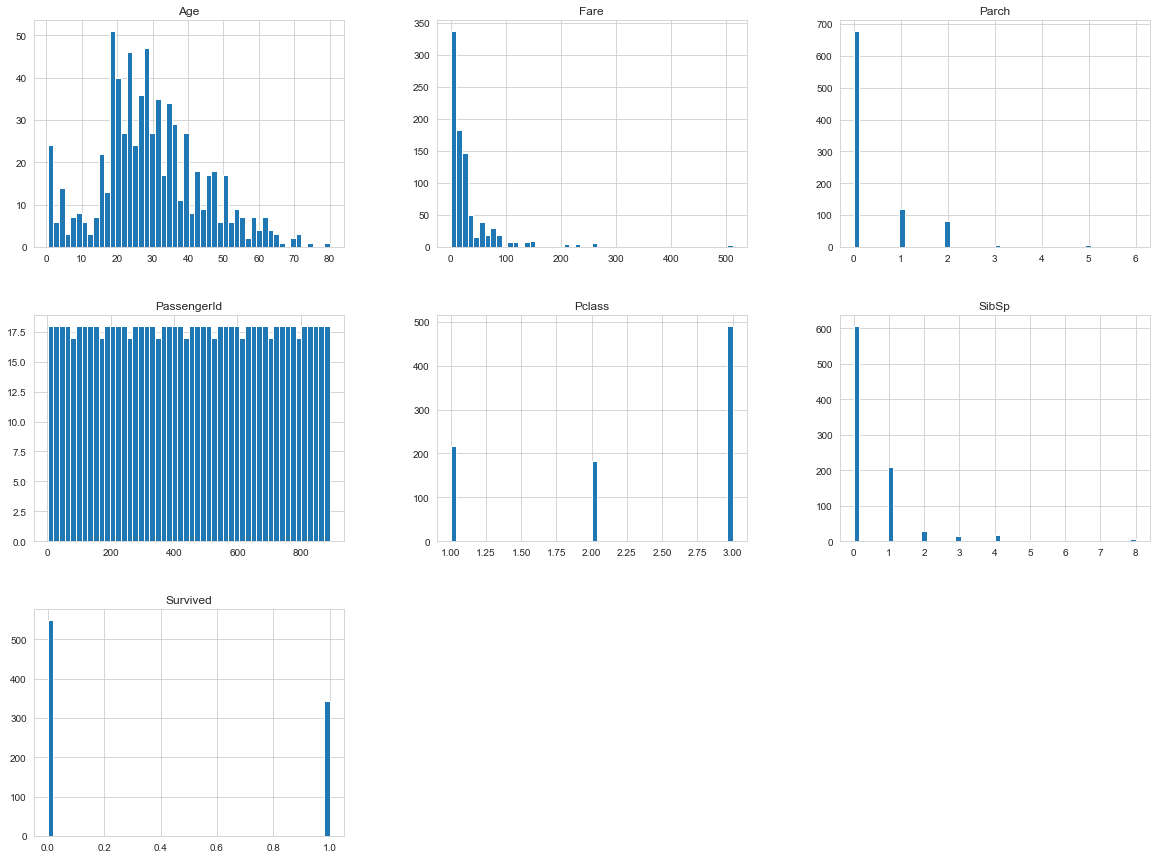

In [246]:
# lets see the data by plotting hiostogram:---
import matplotlib.pyplot as plt
data.hist(bins=50,figsize=(20,15))
plt.show()

In [247]:
# Lets see if the data has any NULL values or Missing Values
# -- By Heatmap of Seaborn library

In [248]:
import seaborn as sns

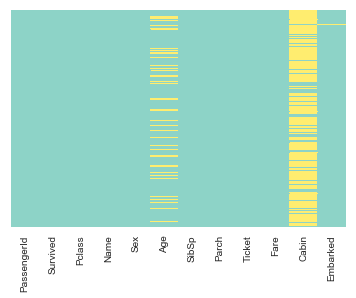

In [249]:
sns.heatmap(data.isnull(),cbar=False,yticklabels=False,cmap="Set3")

In [250]:
# The yellow spaces in the above plot shows the missing values of which we need to take care of.

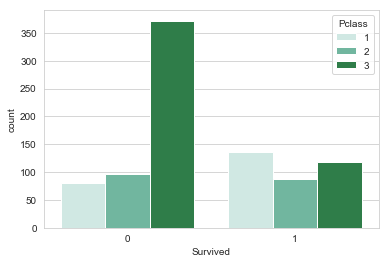

In [251]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",hue="Pclass", palette="BuGn",data=data)

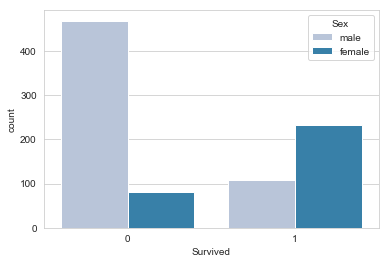

In [252]:
sns.countplot(x="Survived",hue="Sex", palette="PuBu",data=data)

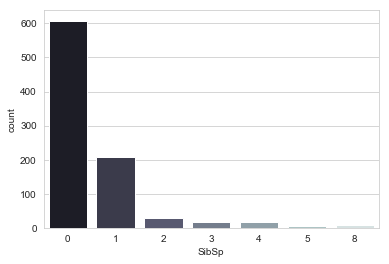

In [253]:
sns.countplot(x="SibSp", palette="bone",data=data)

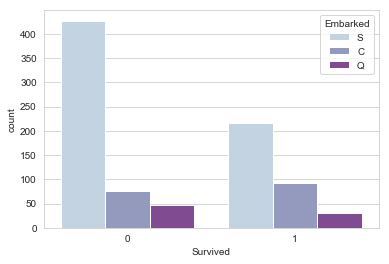

In [254]:
sns.countplot(x="Survived",hue="Embarked", palette="BuPu",data=data)

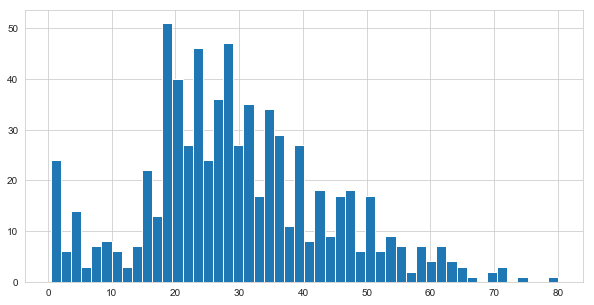

In [255]:
data["Age"].hist(bins=50,figsize=(10,5))
plt.show()

In [256]:
data.interpolate(inplace=True)

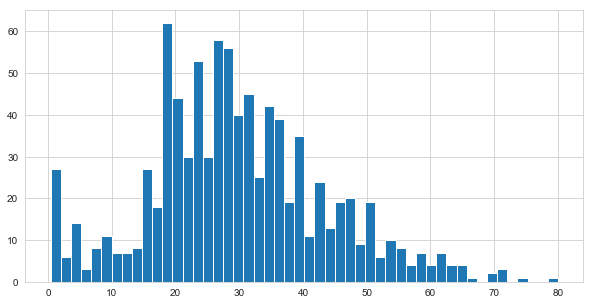

In [257]:
data["Age"].hist(bins=50,figsize=(10,5))
plt.show()

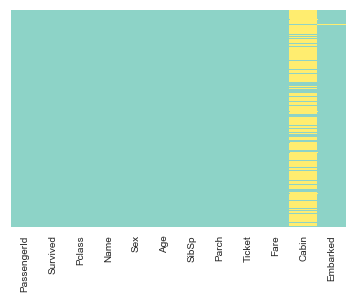

In [258]:
sns.heatmap(data.isnull(),cbar=False,yticklabels=False,cmap="Set3")

In [259]:
data.drop(columns="Cabin",inplace=True)

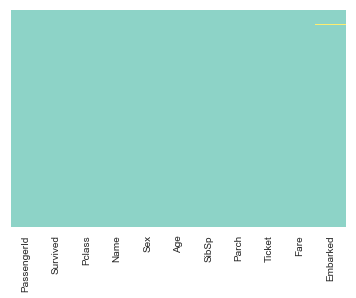

In [260]:
sns.heatmap(data.isnull(),cbar=False,yticklabels=False,cmap="Set3")

In [261]:
data.replace(np.nan,"S",inplace=True)

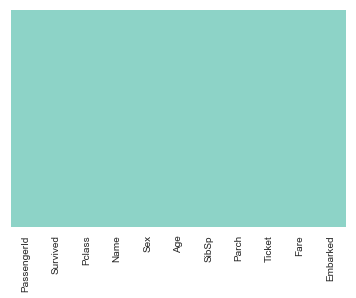

In [262]:
sns.heatmap(data.isnull(),cbar=False,yticklabels=False,cmap="Set3")

In [263]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [264]:
# Lets deal with categorical values

In [265]:
data=pd.get_dummies(data,columns=["Sex","Embarked"],drop_first=True)

In [266]:
data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1


In [267]:
data.drop(columns=["Name","Ticket","PassengerId"],
    inplace=True)

In [268]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [290]:
y=data["Survived"]
x=data.drop(columns="Survived")

In [291]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [292]:

x=x.values
x[2]

array([ 3.   , 26.   ,  0.   ,  0.   ,  7.925,  0.   ,  0.   ,  1.   ])

In [274]:
from sklearn.model_selection import train_test_split

In [275]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3)

In [276]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=150)
model.fit(train_x,train_y)

C:\Users\Yash\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=150, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [306]:
prediction=model.predict(test_x)
print(model.predict(np.array([ 1,38.0,1,0,71.2833,0,0,0]).reshape(1, -1)))

[1]


In [307]:
from sklearn.metrics import confusion_matrix

In [308]:
accuracy=confusion_matrix(test_y,prediction)

In [309]:
accuracy

array([[144,  18],
       [ 33,  73]], dtype=int64)

In [310]:
from sklearn.metrics import accuracy_score

In [311]:
acc_scr=accuracy_score(test_y,prediction)
acc_scr

0.8097014925373134

In [312]:
pickle.dump(model,open("model.pkl","wb"))

In [313]:
model=pickle.load(open("model.pkl","rb"))

In [315]:
print(model.predict(np.array([ 1,38.0,1,0,71.2833,0,0,0 ]).reshape(1,-1)))

[1]


In [225]:
# aaa=pd. DataFrame(np.array([1,3,26.0,0,0,7.9250,0,0,1]).reshape(1,-1))

In [226]:
# aaa

,0,1,2,3,4,5,6,7,8
0,1.0,3.0,26.0,0.0,0.0,7.925,0.0,0.0,1.0


In [ ]:
# 1,0,3,Braund, Mr. Owen Harris,,male,22.0,1,0,A/5 21171,7.2500,NaN,S 